El algoritmo se desarrolla en un tramo en el intervalo  $[a,b]$  junto a la gráfica para mostrar el concepto. Para el ejemplo el integral buscado es:

\begin{equation}
\int_{1}^{3} \sqrt{x}  sin(x) \cdot dx
\end{equation}

In [1]:
# Integración: Cuadratura de Gauss de dos puntos
# modelo con varios tramos entre [a,b]
import numpy as np
import matplotlib.pyplot as plt

# cuadratura de Gauss de dos puntos
def integraCuadGauss2p(funcionx,a,b):
    x0 = -1/np.sqrt(3)
    x1 = -x0
    xa = (b+a)/2 + (b-a)/2*(x0)
    xb = (b+a)/2 + (b-a)/2*(x1)
    area = ((b-a)/2)*(funcionx(xa) + funcionx(xb))
    return(area)

# INGRESO
fx = lambda x: np.sqrt(x)*np.sin(x)

# intervalo de integración
a = 1
b = 3
tramos = 4

# PROCEDIMIENTO
muestras = tramos+1
xi = np.linspace(a,b,muestras)
area = 0
for i in range(0,muestras-1,1):
    deltaA = integraCuadGauss2p(fx,xi[i],xi[i+1])
    area = area + deltaA
# SALIDA
print('Integral: ', area)

Integral:  2.0535771900286597


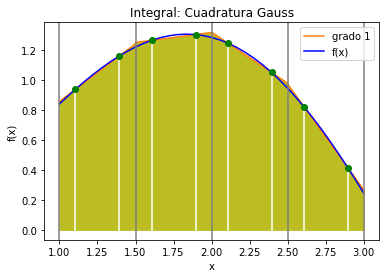

In [2]:
# GRAFICAR por cada Segmento
# para concepto con pocos segmentos
x0 = -1/np.sqrt(3) 
x1 = 1/np.sqrt(3)

# arregos para gráficas
xi = np.array([])
fi = np.array([])

xat = np.array([])
xbt = np.array([])

recta = np.array([])

muestrastramo = 10
subtramo = np.linspace(a,b,muestras)

for i in range(0,tramos,1):
    at = subtramo[i]
    bt = subtramo[i+1]
    
    xit = np.linspace(at,bt,muestrastramo)
    fit = fx(xit)
    
    xi = np.concatenate((xi,xit))
    fi = np.concatenate((fi,fit))

    # puntos xa y xb por tramo
    xa = (bt+at)/2 + (bt-at)/2*(x0)
    xb = (bt+at)/2 + (bt-at)/2*(x1)
    
    xat = np.concatenate((xat,[xa]))
    xbt = np.concatenate((xbt,[xb]))
    
    # Recta entre puntos x0 y x1 por tramo
    m = (fx(xb)-fx(xa))/(xb-xa)
    b0 = fx(xa)- m*xa
    linea = b0 + m*xit
    recta = np.concatenate((recta,linea))

# Marcadores 'o' de xa y xb por tramos
puntox = np.concatenate((xat,xbt))
puntoy = fx(puntox)

# Graficando
# Trazado de lineas
plt.plot(xi,recta, label = 'grado 1', color = 'tab:orange')
plt.fill_between(xi,0,recta, color='tab:olive')
plt.plot(xi,fi, label='f(x)', color = 'blue')

# Verticales para dividir los tramos
for j in range(0,len(subtramo),1):
    plt.axvline(subtramo[j], color='tab:gray')
    
# Marcadores de puntos xa y xb por tramos
for j in range(0,len(xat),1):
    plt.axvline(xat[j], color='w')
    plt.axvline(xbt[j], color='w')
    
plt.plot(puntox,puntoy, 'o', color='g')

plt.title('Integral: Cuadratura Gauss')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

plt.show()